<h1>Project Name - Restaurant Analysis</h1>
<ol>
<li><b>Project Type</b> - EDA
<li><b>Industry </b>- Cognifyz Technologies
<li><b>Contribution </b>- Individual
<li><b>Member Name</b> - Krishi Devani
<li><b>Level</b> - 2
</ol>

<h3>Level 2 Tasks:</h3>
<h4>Task 1: Table Booking and Online Delivery</h4>
<ol>
<li>Determine the percentage of restaurants that
offer table booking and online delivery.</li>
<li>Compare the average ratings of restaurants
with table booking and those without.</li>
<li>Analyze the availability of online delivery
among restaurants with different price ranges.</li>

</ol>
<h4>Task 2: Price Range Analysis</h4>
<ol>
<li>Determine the most common price range
among all the restaurants.</li>
<li>Calculate the average rating for each price
range.</li>
<li>Identify the color that represents the highest
average rating among different price ranges.</li>

</ol>

<h4>Task 3: Feature Engineering</h4>
<ol>
<li>Extract additional features from the existing
columns, such as the length of the restaurant
name or address.</li>
<li>Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.</li>
</ol>

<h1>Task 1: Table Booking and Online Delivery</h1>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("Dataset.csv")
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


<h1>Percentage of Table Booking and Online Delivery</h1>

In [4]:

total_restaurants = len(df)

table_booking_percentage = (df['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.66%


<h1>Restaurants with and without Table Booking</h1>

In [5]:

avg_rating_with_table = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"Average rating with Table Booking: {avg_rating_with_table:.2f}")
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f}")

Average rating with Table Booking: 3.44
Average rating without Table Booking: 2.56


<h1>Availability of Online Delivery</h1>

In [6]:

price_ranges = df['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = df.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()

print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791


<h1>Task 2: Price Range Analysis</h1>

<h1>Most Common Price Range</h1>

In [7]:

most_common_price_range = df['Price range'].mode()[0]
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


<h1>Average Rating for Each Price Range<h1>

In [8]:
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("Average rating for each price range:")
print(round(avg_rating_by_price_range,3))

Average rating for each price range:
Price range
1    2.000
2    2.941
3    3.683
4    3.818
Name: Aggregate rating, dtype: float64


<h1>Highest Average Rating Among Different Price Ranges</h1>

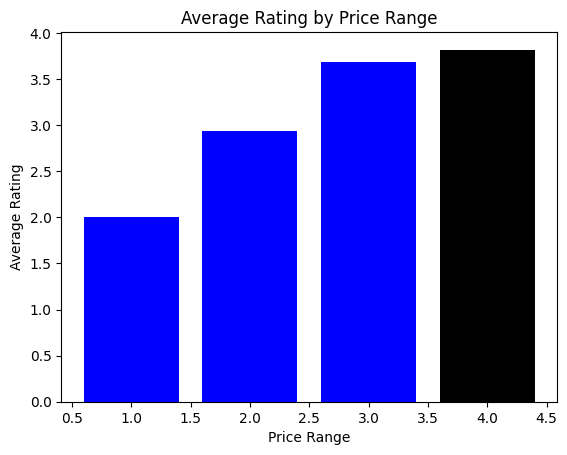

In [12]:
import matplotlib.pyplot as plt
highest_avg_rating_color = avg_rating_by_price_range.idxmax()
plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='blue')
plt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color='black')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')


plt.show()

<h1>Task 3 - Feature Engineering </h1>

In [13]:
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
7956,18421471,Oven Fresh,1,New Delhi,"B 168, Jhilmil Colony, Vivek Vihar, New Delhi",Vivek Vihar,"Vivek Vihar, New Delhi",77.311922,28.669583,Bakery,...,No,No,No,1,0.0,White,Not rated,0,10,45
8402,4721,Cheenos,1,Noida,"P-11, 2nd & 3rd Floor, Above Sony Centre, Sect...",Sector 18,"Sector 18, Noida",77.324544,28.568573,"American, Italian",...,No,No,No,3,2.6,Orange,Average,521,7,58
4019,3379,La Piazza - Hyatt Regency,1,New Delhi,"Hyatt Regency, Bhikaji Cama Place, New Delhi","Hyatt Regency, Bhikaji Cama Place","Hyatt Regency, Bhikaji Cama Place, New Delhi",77.185331,28.569040,Italian,...,No,No,No,4,3.9,Yellow,Good,410,25,44
537,17678218,Smok'n Pig B-B-Q,216,Valdosta,"4228 N Valdosta Rd, Valdosta, GA 31602",Valdosta,"Valdosta, Valdosta",-83.332796,30.897087,BBQ,...,No,No,No,2,4.1,Green,Very Good,575,16,38
8396,1698,Anchor Bar & Kitchen,1,Noida,"C-26/27, Sector 18, Noida",Sector 18,"Sector 18, Noida",77.325049,28.570641,"North Indian, Chinese",...,No,No,No,3,2.5,Orange,Average,106,20,25


<h1>Create New Features</h1>

In [15]:
df['Has Table Booking'] = np.where(df['Has Table booking'] == 'Yes', 1, 0)
df['Has Online Delivery'] = np.where(df['Has Online delivery'] == 'Yes', 1, 0)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0
